In [31]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [41]:
#full pre-activation방식
def conv2_x(x):

    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [42]:
def conv3_x(x):
    x1=layers.Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=512,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [43]:
def conv4_x(x):
    x1=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=1024,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [44]:
def conv5_x(x):
    x1=layers.Conv2D(filters=512,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=2048,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [55]:
def ReductionBlock(x,f1,f2):

    x=layers.Conv2D(filters=f1,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=f1,kernel_size=(3,3),strides=(2,2),padding='same')(x)
    x=layers.BatchNormalization()(x) 
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=f2,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)

    return x
    

In [62]:
input=Input(shape=(224,224,3))
x=layers.Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),padding='same')(input)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=layers.MaxPooling2D(pool_size=(3,3),strides=(2,2))(x)
x=layers.Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x) 
x=layers.ReLU()(x)
x=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=conv2_x(x)
x=conv2_x(x)

x=ReductionBlock(x,128,512)
x=conv3_x(x)
x=conv3_x(x)
x=conv3_x(x)

x=ReductionBlock(x,256,1024)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)

x=ReductionBlock(x,512,2048)
x=conv5_x(x)
x=conv5_x(x)

x=layers.GlobalAveragePooling2D()(x)
output=layers.Dense(units=10,activation='softmax')(x)

model = tf.keras.models.Model(input,output)

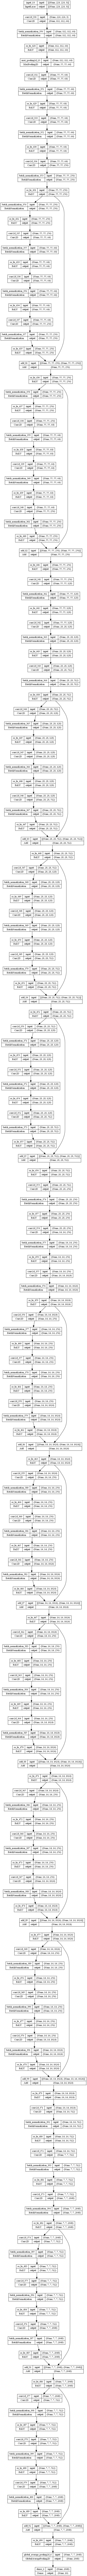

In [63]:
plot_model(model,to_file='ResNet_50.png',show_shapes=True)

In [61]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 112, 112, 64  9472        ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_299 (Batch  (None, 112, 112, 64  256        ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1,batch_size=8,verbose=1)